# CS5228-KDDM, 2024/25-2, Coursework 1

Introduction
•	This coursework comprises 3 parts, Part 1 and 2 are Python programming for data mining, Part 3 contains 4 MCQs. 
•	Total CA marks of this coursework is 12. Details of marks/parts are below. 
•	A Canvas quiz will be open for your coursework submission.  
•	For Python programming parts, I urge you to complete a Jupyter notebook and submit it. cw1-template.ipynb is the template for your answer. You have to run your codes and get sure that answers are available in the notebook before submission. 
•	Regarding MCQs, there is one and only one correct answer for each question. So select the best option. There is no penalty for wrong answers. 
•	The deadline for this coursework is 16/2/2025. Please be aware that no delayed submission is possible. 
•	Good luck, my friends. 


#### Student Name: Himanshu Maithani
#### Student Number: A0314584B

### CW1, Part 1: Data Preprocessing using Python (2+2=4 marks)

### CW1-1-1: Data Cleaning (2 marks)
Datasets: a1-condo-resale-dirty.csv, and a1-condo-resale-nan.csv 


CW1-1-1 (1) Use a1-condo-resale-dirty.csv , We argued in the lecture that almost all real-world 
datasets contain some form of noise that might negatively affect any applied data 
analysis. The very first -- and in some sense -- easiest way to identify noise is to check if 
all data confirms with the data description. If you check the dataset against its 
description as given above -- with the help of Pandas or by simply inspecting the raw 
data file -- you will notice that many records are "dirty", meaning they are not in the 
expected format. Dirty records can negatively affect any subsequent analysis it needs. 
So, develop a Python program that reads the contents of the data file and removes the 
dirty data samples. (A data sample = a data record = a row in the csv or excel file.) Your 
program should print any case of removal and at the end show the number of removed 
records, and save the clean data file as result1-1.csv . 

In [396]:
import pandas as pd

# cw1-1-1 a)
# Load dataset
input_file = "a1-condo-resale-dirty.csv"
df1 = pd.read_csv(input_file)
df1.head()

,transaction_id,url,name,type,postal_district,subzone,planning_area,date_of_sale,area_sqft,floor_level,eco_category,price
0,82953057,https://condo-sg.com/treasure-at-tampines-5009,treasure at tampines,condominium,18,tampines east,tampines,jul-19,818,06 to 10,A,1024000
1,17139360,https://condo-sg.com/parc-central-residences-4954,parc central residences,executive condominium,18,tampines west,tampines,apr-21,990,11 to 15,A,1187000
2,22288515,NaN,martina mansions,apartment,10,nassim,tanglin,jan-20,1259,01 to 05,A,2300000
3,80737365,https://condo-sg.com/the-pier-at-robertson-1701,the pier at robertson,apartment,9,robertson quay,singapore river,jun-19,1044,06 to 10,A,2400000
4,83154310,https://condo-sg.com/rivercove-residences-1525,rivercove residences,executive condominium,19,anchorvale,sengkang,oct-18,1184,16 to 20,A,1239100


In [397]:
# Identifying data
print(df1.describe())

       postal_district     area_sqft         price
count     20000.000000  20000.000000  2.000000e+04
mean         14.158600   1001.087800  1.534645e+06
std           7.556183    593.889466  1.323018e+06
min           0.000000     -1.000000  3.400000e+05
25%           9.000000    667.000000  9.550000e+05
50%          15.000000    947.000000  1.258000e+06
75%          19.000000   1238.000000  1.690000e+06
max          28.000000  21108.000000  6.200000e+07


In [398]:
# Remove rows with missing values
print("Missing values before handling:")
print(df1.isnull().sum())
df1 = df1.dropna()

Missing values before handling:
transaction_id       0
url                324
name                 0
type                 0
postal_district      0
subzone              0
planning_area        0
date_of_sale         0
area_sqft            0
floor_level          0
eco_category         0
price                0
dtype: int64


In [399]:
# Check transaction_id: Should be an 8-digit integer
df1["transaction_id"] = pd.to_numeric(df1["transaction_id"], errors='coerce')
valid_ids = df1["transaction_id"].between(10000000, 99999999)
invalid_rows = df1[~valid_ids]
print("Invalid transaction_id:")
print(invalid_rows[["transaction_id", "name"]].head())

# Remove the invalid rows
print("Number of invalid transaction_id:", len(invalid_rows))
df1 = df1[valid_ids]

Invalid transaction_id:
     transaction_id                  name
107             NaN  treasure at tampines
112             NaN         kovan regency
145             NaN        the belleforte
151             NaN   thomson impressions
169             NaN             jadescape
Number of invalid transaction_id: 607


In [400]:
#postal district: Should be an integer between 1 and 28
df1["postal_district"] = pd.to_numeric(df1["postal_district"], errors='coerce')
valid_districts = df1["postal_district"].between(1, 28)
invalid_rows = df1[~valid_districts]
print("Invalid postal_district:")
print(invalid_rows[["postal_district", "name"]].head())

# remove the invalid rows
print("Number of invalid postal_district:", len(invalid_rows))
df1 = df1[valid_districts]

Invalid postal_district:
     postal_district                          name
27                 0                   the estuary
40                 0         affinity at serangoon
77                 0                     sims edge
95                 0  the watergardens at canberra
119                0          treasure at tampines
Number of invalid postal_district: 942


In [401]:
# area_sqft: The size of the condo flat in square feet as a positive integer value.
df1["area_sqft"] = pd.to_numeric(df1["area_sqft"], errors='coerce')
valid_area = df1["area_sqft"] > 0
invalid_rows = df1[~valid_area]
print("Invalid area_sqft:")
print(invalid_rows[["area_sqft", "name"]].head())

# remove the invalid rows
print("Number of invalid area_sqft:", len(invalid_rows))
df1 = df1[valid_area]

Invalid area_sqft:
    area_sqft                        name
24         -1               park colonial
25         -1             uptown @ farrer
59         -1   pullman residences newton
64         -1                 the mayfair
65         -1  ki residences at brookvale
Number of invalid area_sqft: 954


CW1-1-1 (2) Recall from the lecture that data cleaning often involves making certain decisions. As 
such, you might come up with different steps than other students. This is OK as long as 
you can reasonably justify your steps. 

In [402]:
# Find duplicates based on transaction_id or url
duplicates_id = df1[df1.duplicated(subset=["transaction_id"], keep=False)]
duplicate_indices_id = duplicates_id.index
duplicates_url = df1[df1.duplicated(subset=["url"], keep=False)]
duplicate_indices_url = duplicates_url.index

print("Duplicate transaction_id:")
print(duplicates_id[["transaction_id", "name"]].head())
print("\nDuplicate url:")
print(duplicates_url[["url", "name"]].head())
num_duplicate_id = len(df1) - len(df1.drop_duplicates(subset=["transaction_id"]))
num_duplicate_url = len(df1) - len(df1.drop_duplicates(subset=["url"]))
print("\nNumber of duplicate transaction_id:", num_duplicate_id)
print("Number of duplicate url:", num_duplicate_url)

# Remove duplicates
df1 = df1.drop_duplicates(subset=["transaction_id"])
df1 = df1.drop_duplicates(subset=["url"])

Duplicate transaction_id:
     transaction_id                  name
39       62514318.0            riversails
442      37593045.0        view at kismis
450      16156356.0           chestervale
508      77179624.0           forestville
540      82546642.0  rivercove residences

Duplicate url:
                                                 url                     name
0     https://condo-sg.com/treasure-at-tampines-5009     treasure at tampines
1  https://condo-sg.com/parc-central-residences-4954  parc central residences
4     https://condo-sg.com/rivercove-residences-1525     rivercove residences
5           https://condo-sg.com/oue-twin-peaks-7425           oue twin peaks
6           https://condo-sg.com/gem-residences-4789           gem residences

Number of duplicate transaction_id: 149
Number of duplicate url: 5822


In [403]:
output_file = "result1-1.csv"
df1.to_csv(output_file, index=False)
print("Normalized dataset saved as result1-1.csv")

Normalized dataset saved as result1-1.csv


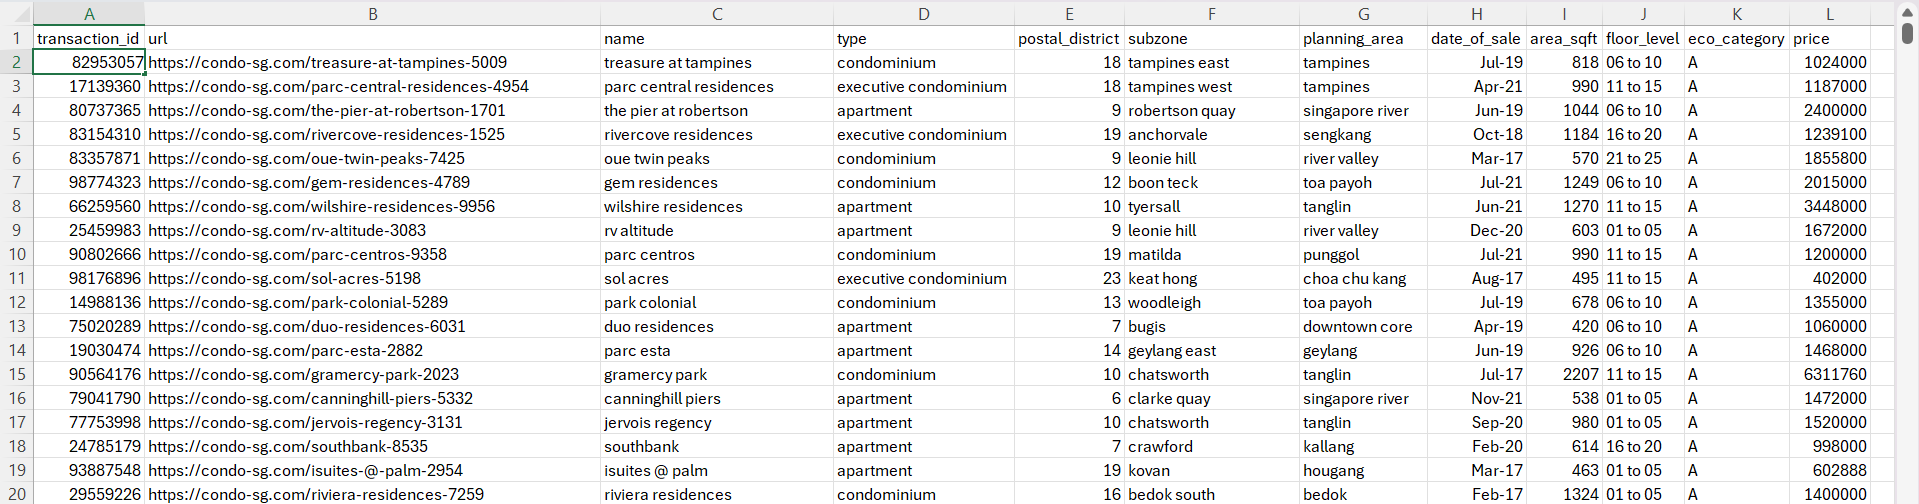

CW1-1-1 (3) Use a1-condo-resale-nan.csv, and develop a Python program to remove any data 
sample with empty cells. Your program should print the number and percentage of 
removed data samples and save the final nan-free dataset as result1-2.csv.  

In [404]:
# cw1-1-1 b)
input_file = "a1-condo-resale-nan.csv"
df1c = pd.read_csv(input_file)
df1c.head()

,transaction_id,url,name,type,postal_district,subzone,planning_area,date_of_sale,area_sqft,floor_level,eco_category,price
0,95103981,http://condo-sg.com/alex-residences-3570,alex residences,apartment,3,redhill,bukit merah,oct-21,883,01 to 05,A,1595880.0
1,69374014,http://condo-sg.com/the-rivervale-4160,the rivervale,executive condominium,19,rivervale,sengkang,jul-17,1313,06 to 10,A,900000.0
2,54377409,http://condo-sg.com/parc-palais-5143,parc palais,condominium,21,hillview,bukit batok,sep-21,1389,01 to 05,A,1810000.0
3,64749050,NaN,hedges park condominium,condominium,17,flora drive,pasir ris,may-19,484,01 to 05,A,565000.0
4,18136469,NaN,kingsford waterbay,apartment,19,kangkar,hougang,may-21,678,06 to 10,A,875000.0


In [405]:
# Remove rows with missing values
nan_rows = df1c[df1c.isnull().any(axis=1)]
nan_count = len(nan_rows)
total_rows = len(df1c)

cleaned_df1c = df1c.dropna()
print(f"Removed {nan_count} records ({(nan_count/total_rows)*100:.2f}%) with missing values.")

output_file = "result1-2.csv"
cleaned_df1c.to_csv(output_file, index=False)
print("Normalized dataset saved as result1-2.csv")

Removed 3741 records (18.70%) with missing values.
Normalized dataset saved as result1-2.csv


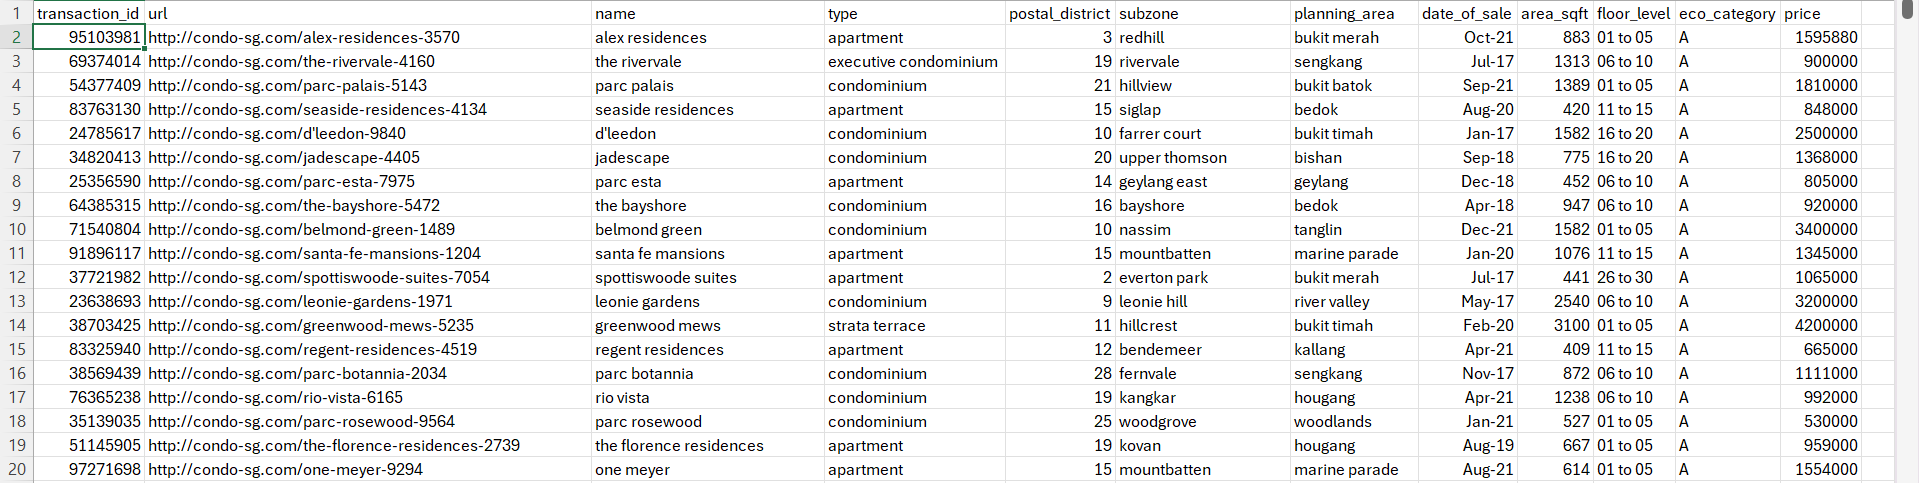

### CW1-1-2: Data Transformation (2 marks) 
Datasets: a1-condo-resale-others.csv 
This dataset is assumed to be clean and without any missing or dirty values. 


In [406]:
import pandas as pd

df1d = pd.read_csv("a1-condo-resale-others.csv")
df1d.head()

,transaction_id,url,name,type,postal_district,subzone,planning_area,date_of_sale,area_sqft,floor_level,eco_category,price
0,72606080,https://condo-sg.com/amber-park-4904,amber park,condominium,15,marine parade,marine parade,apr-21,678,16 to 20,A,1679130
1,62765491,https://condo-sg.com/braddell-view-5318,braddell view,apartment,20,toa payoh west,Toa Payoh,oct-20,1701,01 to 05,A,1255000
2,65584694,https://condo-sg.com/tangerine-grove-2635,tangerine grove,condominium,19,tai seng,hougang,nov-18,947,01 to 05,A,1130000
3,16401608,https://condo-sg.com/goldenhill-park-condomini...,goldenhill park condominium,condominium,20,lorong chuan,serangoon,mar-21,1313,01 to 05,A,2000000
4,53975895,https://condo-sg.com/kingsford-waterbay-1085,kingsford waterbay,apartment,19,kangkar,hougang,may-17,883,06 to 10,A,1030000


In [407]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

# Columns to encode
columns_to_encode = ["type", "floor_level", "eco_category"]
for col in columns_to_encode:
    label_encoders[col] = LabelEncoder()
    df1d[col] = label_encoders[col].fit_transform(df1d[col])

df1d.head(15)

,transaction_id,url,name,type,postal_district,subzone,planning_area,date_of_sale,area_sqft,floor_level,eco_category,price
0,72606080,https://condo-sg.com/amber-park-4904,amber park,1,15,marine parade,marine parade,apr-21,678,3,0,1679130
1,62765491,https://condo-sg.com/braddell-view-5318,braddell view,0,20,toa payoh west,Toa Payoh,oct-20,1701,0,0,1255000
2,65584694,https://condo-sg.com/tangerine-grove-2635,tangerine grove,1,19,tai seng,hougang,nov-18,947,0,0,1130000
3,16401608,https://condo-sg.com/goldenhill-park-condomini...,goldenhill park condominium,1,20,lorong chuan,serangoon,mar-21,1313,0,0,2000000
4,53975895,https://condo-sg.com/kingsford-waterbay-1085,kingsford waterbay,0,19,kangkar,hougang,may-17,883,1,0,1030000
5,27667111,https://condo-sg.com/commonwealth-towers-8273,commonwealth towers,1,3,margaret drive,queenstown,mar-17,1076,3,0,1614600
6,17765402,https://condo-sg.com/regent-heights-8587,regent heights,1,23,guilin,bukit batok,mar-18,1023,3,0,850000
7,52631869,https://condo-sg.com/the-topiary-8360,the topiary,2,28,fernvale,sengkang,aug-21,1389,1,0,1460000
8,38153789,https://condo-sg.com/pollen-&-bleu-2605,pollen & bleu,1,10,tyersall,tanglin,apr-17,1206,1,0,2699600
9,49851994,https://condo-sg.com/hilltops-6486,hilltops,1,9,cairnhill,newton,mar-18,1335,1,0,4046000


In [408]:
df1d.to_csv("result1-3.csv", index=False)
print("Normalized dataset saved as result1-3.csv")

Normalized dataset saved as result1-3.csv


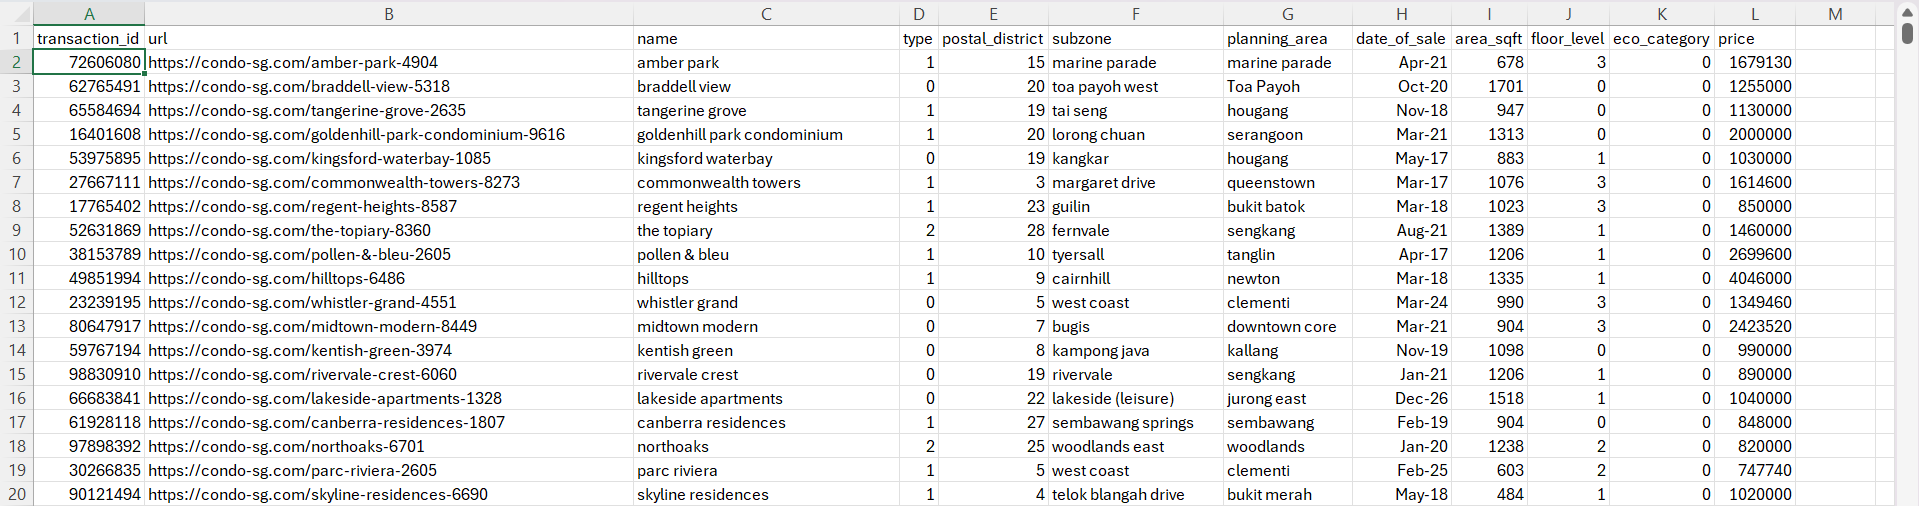

cw1-1-2 (5) Develop a Python program to normalize the contents of columns I, area_sqft, and L, 
price, using z-transform. Your code should show the mean and standard deviation of 
those 2 columns before and after normalization. Also, it should show the last 15 records 
of the transformed dataset, then save the normalized dataset as result1-4.csv. 

In [409]:
import pandas as pd

df2a = pd.read_csv("result1-3.csv")
df2a.head()


,transaction_id,url,name,type,postal_district,subzone,planning_area,date_of_sale,area_sqft,floor_level,eco_category,price
0,72606080,https://condo-sg.com/amber-park-4904,amber park,1,15,marine parade,marine parade,apr-21,678,3,0,1679130
1,62765491,https://condo-sg.com/braddell-view-5318,braddell view,0,20,toa payoh west,Toa Payoh,oct-20,1701,0,0,1255000
2,65584694,https://condo-sg.com/tangerine-grove-2635,tangerine grove,1,19,tai seng,hougang,nov-18,947,0,0,1130000
3,16401608,https://condo-sg.com/goldenhill-park-condomini...,goldenhill park condominium,1,20,lorong chuan,serangoon,mar-21,1313,0,0,2000000
4,53975895,https://condo-sg.com/kingsford-waterbay-1085,kingsford waterbay,0,19,kangkar,hougang,may-17,883,1,0,1030000


In [410]:
# Columns to normalize
columns_to_normalize = ["area_sqft", "price"]

# mean and sd before normalization
for col in columns_to_normalize:
    mean = df2a[col].mean()
    std_dev = df2a[col].std()
    print(f"{col} - Mean before: {mean:.2f}, Std before: {std_dev:.2f}")



area_sqft - Mean before: 998.97, Std before: 573.75
price - Mean before: 1524485.76, Std before: 1244411.09


In [411]:
# Normalize area_sqft
area_sqft_mean = df2a["area_sqft"].mean()
area_sqft_std = df2a["area_sqft"].std()
df2a["area_sqft"] = (df2a["area_sqft"] - area_sqft_mean) / area_sqft_std

# Normalize price
price_mean = df2a["price"].mean()
price_std = df2a["price"].std()
df2a["price"] = (df2a["price"] - price_mean) / price_std

# mean and sd after normalization
for col in columns_to_normalize:
    mean = df2a[col].mean()
    std_dev = df2a[col].std()
    print(f"{col} - Mean after: {mean:.2f}, Std after: {std_dev:.2f}")


area_sqft - Mean after: 0.00, Std after: 1.00
price - Mean after: -0.00, Std after: 1.00


In [412]:
df2a.tail(15)

,transaction_id,url,name,type,postal_district,subzone,planning_area,date_of_sale,area_sqft,floor_level,eco_category,price
19985,55228208,https://condo-sg.com/parc-esta-2937,parc_esta,0,14,geylang east,geylang,nov-18,-0.521080,1,0,-0.261558
19986,28242978,https://condo-sg.com/midtown-modern-3057,midtown modern,0,7,bugis,downtown core,mar-21,-0.484479,4,0,0.336612
19987,42826522,https://condo-sg.com/jadescape-9557,jadescape,1,20,upper thomson,Bishan,sep-18,-0.615198,2,0,-0.349150
19988,26585419,https://condo-sg.com/parc-canberra-5803,parc canberra,2,27,sembawang east,sembawang,feb-20,0.266718,0,0,-0.229414
19989,76003299,https://condo-sg.com/treasure-at-tampines-5074,treasure at tampines,1,18,tampines east,tampines,jul-20,-0.559424,1,0,-0.477725
19990,93791206,https://condo-sg.com/avenue-south-residence-3431,avenue south residence,0,3,kampong tiong bahru,bukit merah,sep-19,-0.334588,0,0,-0.083160
19991,63355040,https://condo-sg.com/guilin-view-7397,guilin view,1,23,guilin,bukit batok,jul-17,0.491554,5,0,-0.365222
19992,45743511,https://condo-sg.com/the-alps-residences-2967,the alps residences,1,18,tampines west,tampines,may-17,-0.540252,1,0,-0.653711
19993,53341306,https://condo-sg.com/e-maison-9541,e maison,0,13,lorong chuan,serangoon,feb-18,0.266718,0,0,-0.004942
19994,78776444,https://condo-sg.com/citylights-4132,citylights,1,8,lavender,kallang,feb-21,-0.559424,4,0,-0.300934


In [413]:
df2a.to_csv("result1-4.csv", index=False)
print("Normalized dataset saved as result1-4.csv")

Normalized dataset saved as result1-4.csv


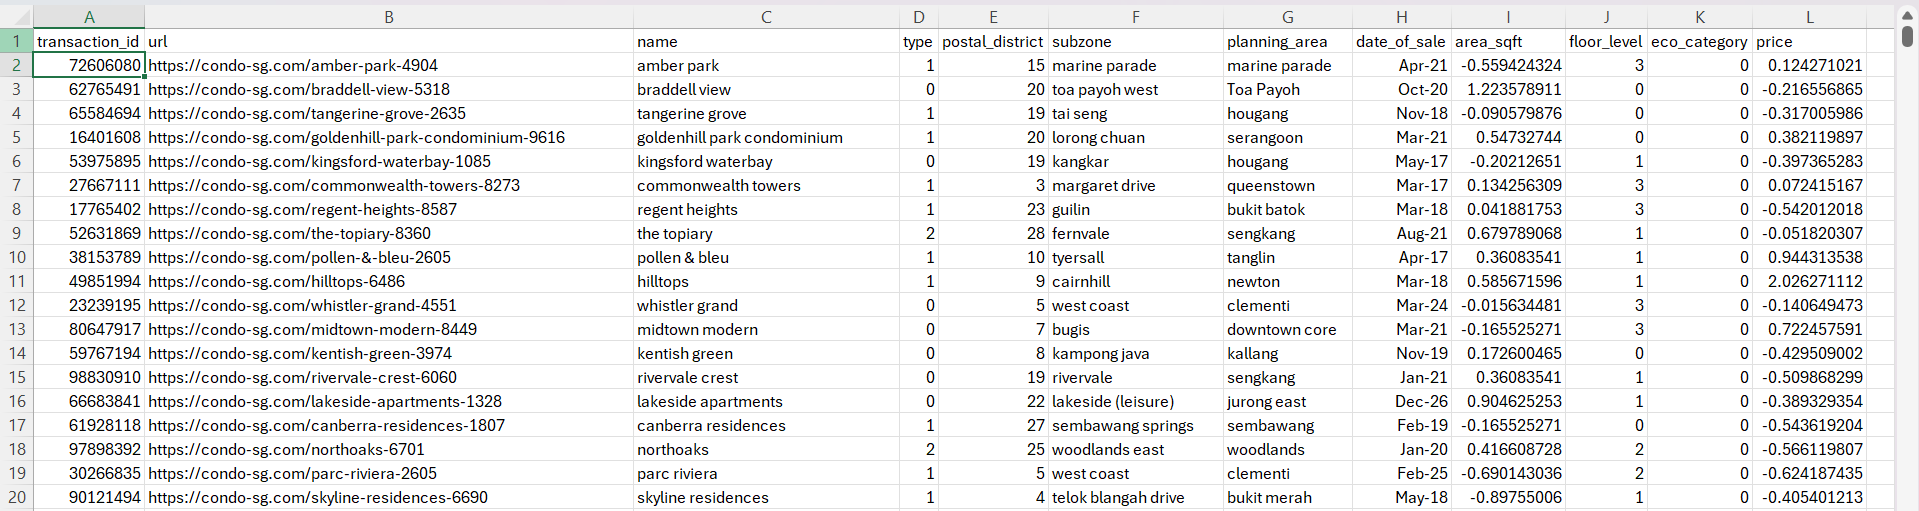

### CW1, Part 2: Clustering using Python (2 marks)
Dataset: a1-kmeans-toy-data.csv 
In the following, your task is to implement the K-Means clustering algorithm. You can and should explore relevant methods provided by numpy or sklearn. 


In [414]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

file_path = "a1-kmeans-toy-data.csv" 
df2 = pd.read_csv(file_path, header=None, names=["x", "y"])
print(df2.head())


       x      y
0 -0.925  6.267
1 -0.402 -9.457
2 -8.784  7.222
3 -0.029  4.299
4  9.949  0.314


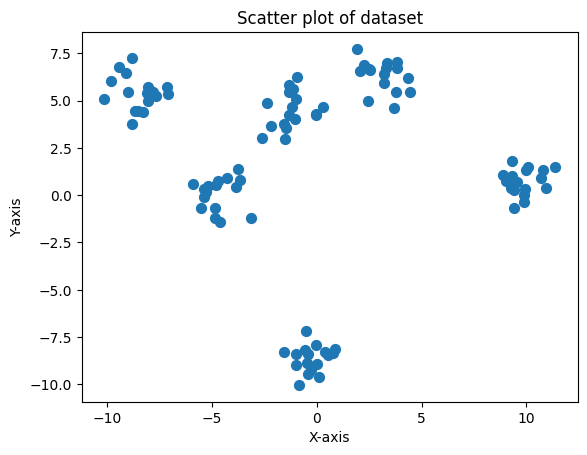

In [415]:
plt.scatter(df2["x"], df2["y"], s=50)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter plot of dataset")
plt.show()


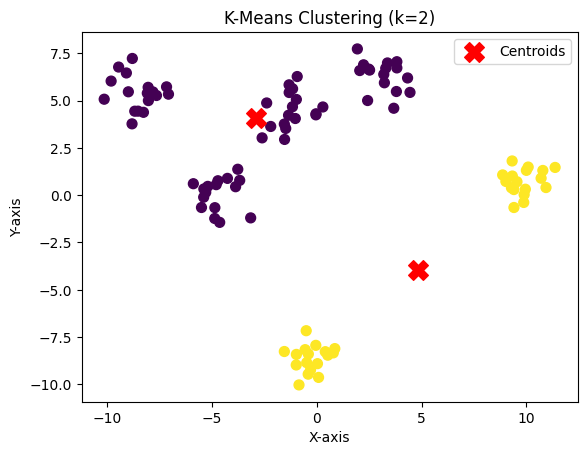

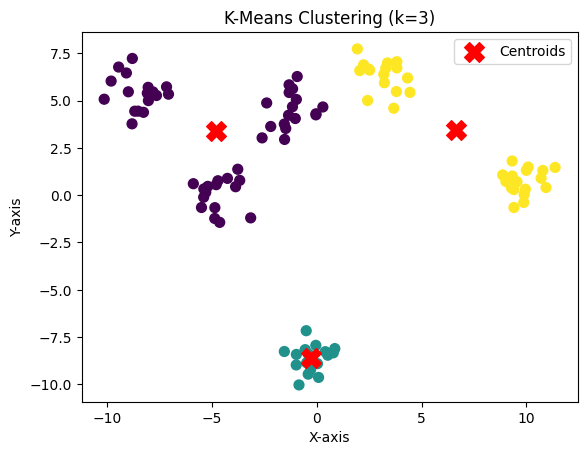

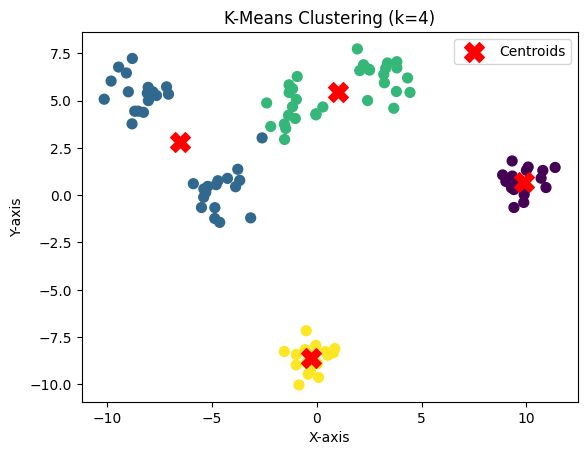

In [416]:
def plot_kmeans(df2, k):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    df2["cluster"] = kmeans.fit_predict(df2[["x", "y"]])

    plt.scatter(df2["x"], df2["y"], c=df2["cluster"], cmap="viridis", s=50)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", marker="X", s=200, label="Centroids")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title(f"K-Means Clustering (k={k})")
    plt.legend()
    plt.show()

for k in [2, 3, 4]:
    plot_kmeans(df2.copy(), k)


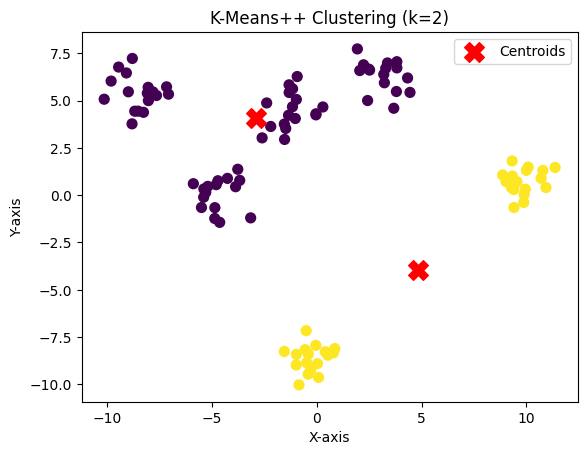

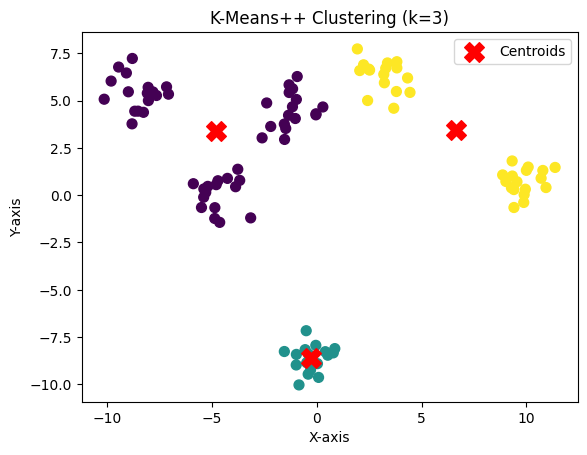

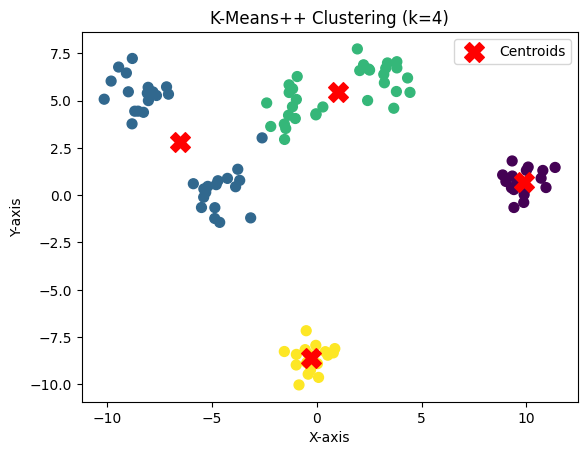

In [417]:
def plot_kmeans_plus(df2, k):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42, n_init=10)
    df2["cluster"] = kmeans.fit_predict(df2[["x", "y"]])

    plt.scatter(df2["x"], df2["y"], c=df2["cluster"], cmap="viridis", s=50)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", marker="X", s=200, label="Centroids")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title(f"K-Means++ Clustering (k={k})")
    plt.legend()
    plt.show()

for k in [2, 3, 4]:
    plot_kmeans_plus(df2.copy(), k)


## Part 3

b. K‑Means, 3 clusters

a. sum(f1)= 21.57  , sum(f2)= 18.6 

b. cosine(A,B)= 0.99  , cosine(A,C)= -0.85 

a. [x5=A , x6=G], then [x1=B , x2=C]